# Duration Histogram

/tmp/ipykernel_1518/2269705331.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  gaming = pd.read_csv("/work/random_50_gaming_usa_videos.csv")
0    PT12M37S
1    PT17M21S
2      PT9M2S
3    PT10M30S
4        PT1M
Name: duration, dtype: object
count    109492.000000
mean         16.491687
std          34.944122
min           0.000000
25%           1.016667
50%          10.450000
75%          16.616667
max         719.866667
Name: duration, dtype: float64


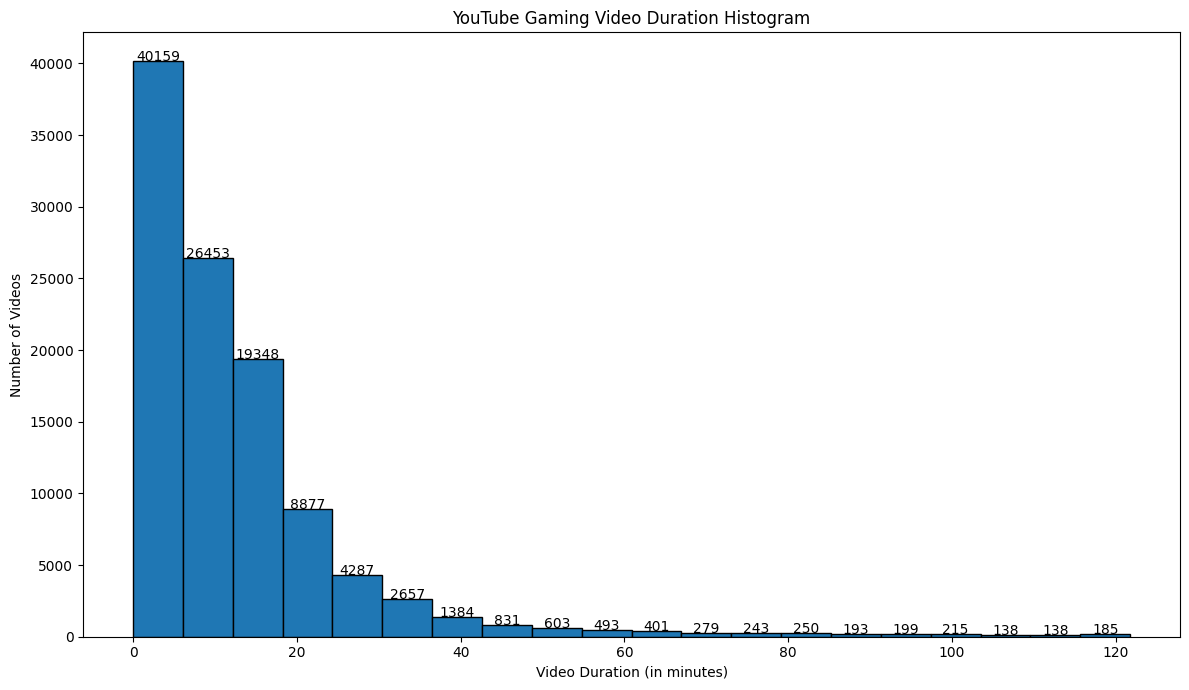

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

gaming = pd.read_csv("/work/random_50_gaming_usa_videos.csv")
duration = gaming["duration"]
# print(duration.info())

print(gaming["duration"].head())
duration = pd.to_timedelta(gaming["duration"])
duration = duration.dt.total_seconds() / 60

print(duration.describe())

Q1 = duration.quantile(0.05)
Q3 = duration.quantile(0.95)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = duration[(duration < Q1 - threshold * IQR) | (duration > Q3 + threshold * IQR)]

duration = duration.drop(outliers.index)

# print(duration.describe())

plt.figure(figsize=(12, 7))
n, bins, patches = plt.hist(duration, bins=20, edgecolor='black')

# duration.hist(bins=20, edgecolor='black')

plt.xlabel('Video Duration (in minutes)')
plt.ylabel('Number of Videos')
plt.title('YouTube Gaming Video Duration Histogram')

for count, bin_edge in zip(n, bins[:-1]):  
    plt.text(bin_edge + (bins[1] - bins[0]) / 2, count + 1, str(int(count)), 
             ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Subscriber Count Histogram (don't modify i'm moving to log scale)

count    5.000000e+01
mean     3.616708e+06
std      6.120527e+06
min      1.040000e+04
25%      1.015000e+06
50%      1.845000e+06
75%      3.360000e+06
max      3.730000e+07
Name: subscriber_count, dtype: float64


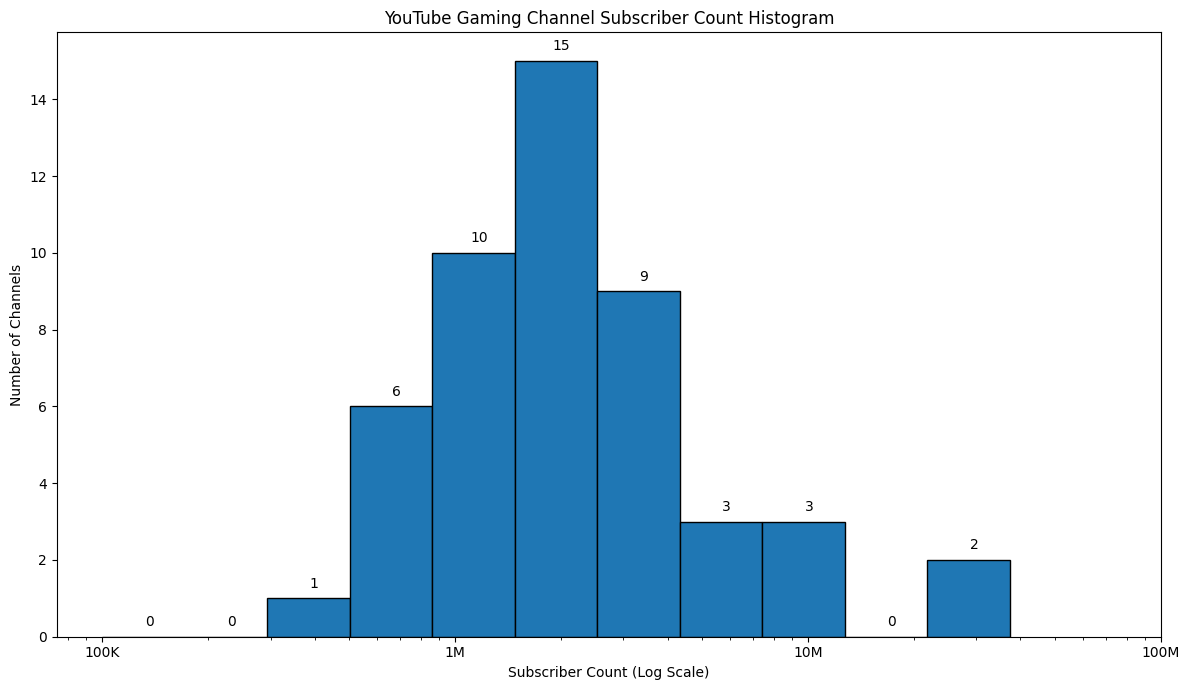

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# gaming = pd.read_csv("/work/random_50_gaming_channel_info.csv")
# subscriber_count = gaming['subscriber_count']

# plt.figure(figsize=(12, 7))

# n, bins, patches = plt.hist(subscriber_count, bins = 20, edgecolor='black')

# print(subscriber_count.describe())

# plt.xlabel('Subscriber Count (in millions)')
# plt.ylabel('Number of Channels')
# plt.title('YouTube Gaming Channel Subscriber Count Histogram')

# for count, rect in zip(n, patches):
#     x_center = 10**(0.5 * (np.log10(rect.get_x()) + np.log10(rect.get_x() + rect.get_width())))
#     plt.text(x_center, count+0.2, 
#              f'{int(count)}', 
#              ha='center', va='bottom')

# plt.tight_layout()

# plt.show()

gaming = pd.read_csv("/work/random_50_gaming_channel_info.csv")
subscriber_count = gaming['subscriber_count']

plt.figure(figsize=(12, 7))

# Use log-scaled bins
bins = np.logspace(np.log10(1e5), np.log10(subscriber_count.max()), 12)

# Create histogram
n, bins, patches = plt.hist(subscriber_count, bins=bins, edgecolor='black')

print(subscriber_count.describe())

plt.xscale('log')
plt.xlabel('Subscriber Count (Log Scale)')
plt.ylabel('Number of Channels')
plt.title('YouTube Gaming Channel Subscriber Count Histogram')

# Annotate each bar with the count
for count, bin_start, bin_end in zip(n, bins[:-1], bins[1:]):
    x_center = (bin_start + bin_end) / 2  # Correctly find the midpoint of each bin
    plt.text(x_center, count + 0.2, f'{int(count)}', ha='center', va='bottom')

plt.xticks(
    [1e5, 1e6, 1e7, 1e8],
    ['100K', '1M', '10M', '100M']
)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# View Histogram

/tmp/ipykernel_1518/3898854413.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  gaming = pd.read_csv("random_50_gaming_usa_videos.csv")


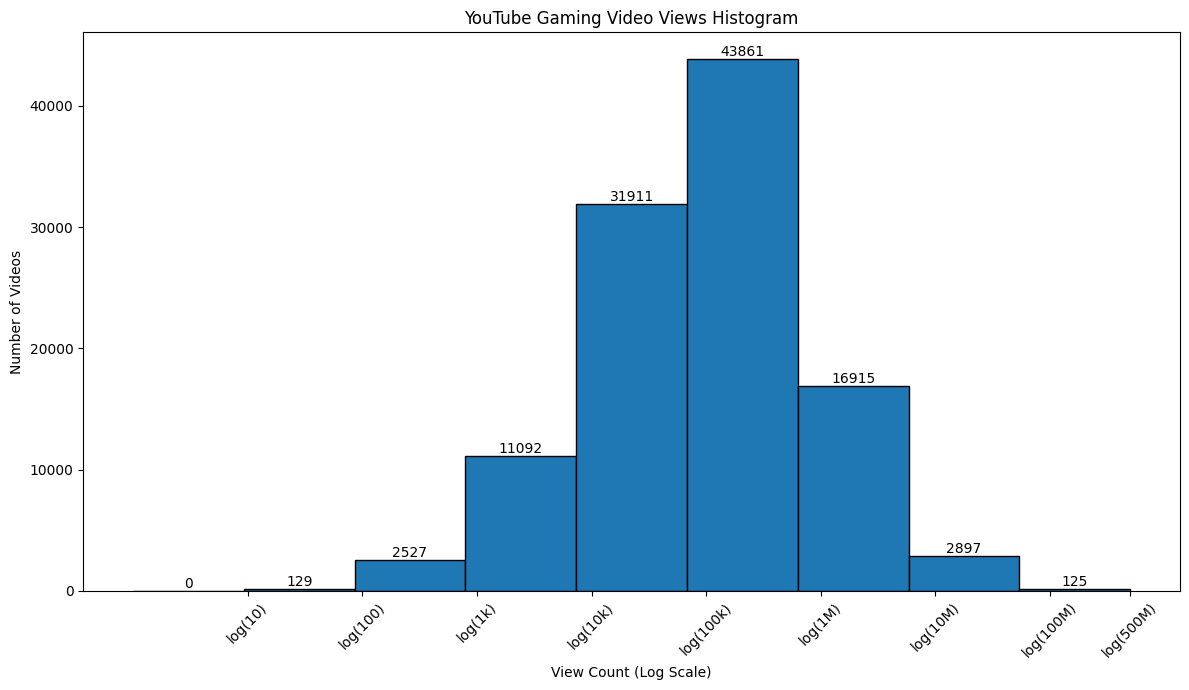

In [3]:
import matplotlib.pyplot as plt
import numpy as np

gaming = pd.read_csv("random_50_gaming_usa_videos.csv")
views = gaming['view']

min_view = 1
max_view = 500000000
num_bins = 10

bins = np.logspace(np.log10(min_view), np.log10(max_view), num=num_bins)


plt.figure(figsize=(12, 7))

n, bins, patches = plt.hist(views, bins=bins, edgecolor='black')

plt.xscale('log')
plt.xticks(
    [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 5e8],
    ['log(10)', 'log(100)', 'log(1k)', 'log(10k)', 'log(100k)', 'log(1M)', 'log(10M)', 'log(100M)', 'log(500M)'],
    rotation=45
)

plt.xlabel('View Count (Log Scale)')
plt.ylabel('Number of Videos')
plt.title('YouTube Gaming Video Views Histogram')
#plt.grid(True, which='both', linestyle='--', alpha=0.7)

for count, rect in zip(n, patches):
    x_center = 10**(0.5 * (np.log10(rect.get_x()) + np.log10(rect.get_x() + rect.get_width())))
    plt.text(x_center, count+0.2, 
             f'{int(count)}', 
             ha='center', va='bottom')

plt.tight_layout()

plt.show()

# Like Histogram

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Read the data
gaming = pd.read_csv("random_50_gaming_usa_videos.csv")
views = pd.to_numeric(gaming['like'])

# Calculate the interquartile range
Q1 = views.quantile(0.05)
Q3 = views.quantile(0.95)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = views[(views < Q1 - threshold * IQR) | (views > Q3 + threshold * IQR)]

views = views.drop(outliers.index)

# Define the bins
bins = [0,10000,25000,50000,75000,100000,300000,500000]

plt.figure(figsize=(12, 7))

# Plot histogram
n, bins, patches = plt.hist(views, bins=bins, edgecolor='black')

# Fix the mismatch by providing matching labels for all bins
plt.xticks(bins, labels=[
    '0', '10k', '25k', '50k', '75k', '100k', '300k', '500k
])

plt.xlabel('Likes')
plt.ylabel('Number of Videos')
plt.title('YouTube Video Like Histogram')
plt.grid(True, which='both', linestyle='--', alpha=0.7)

# Add counts on top of each bar
for count, rect in zip(n, patches):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height + 0.5,
             f'{int(count)}', ha='center', va='bottom')

plt.show()

SyntaxError: unterminated string literal (detected at line 29) (1657683903.py, line 29)

/tmp/ipykernel_40/345357534.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  gaming = pd.read_csv("random_50_gaming_usa_videos.csv")


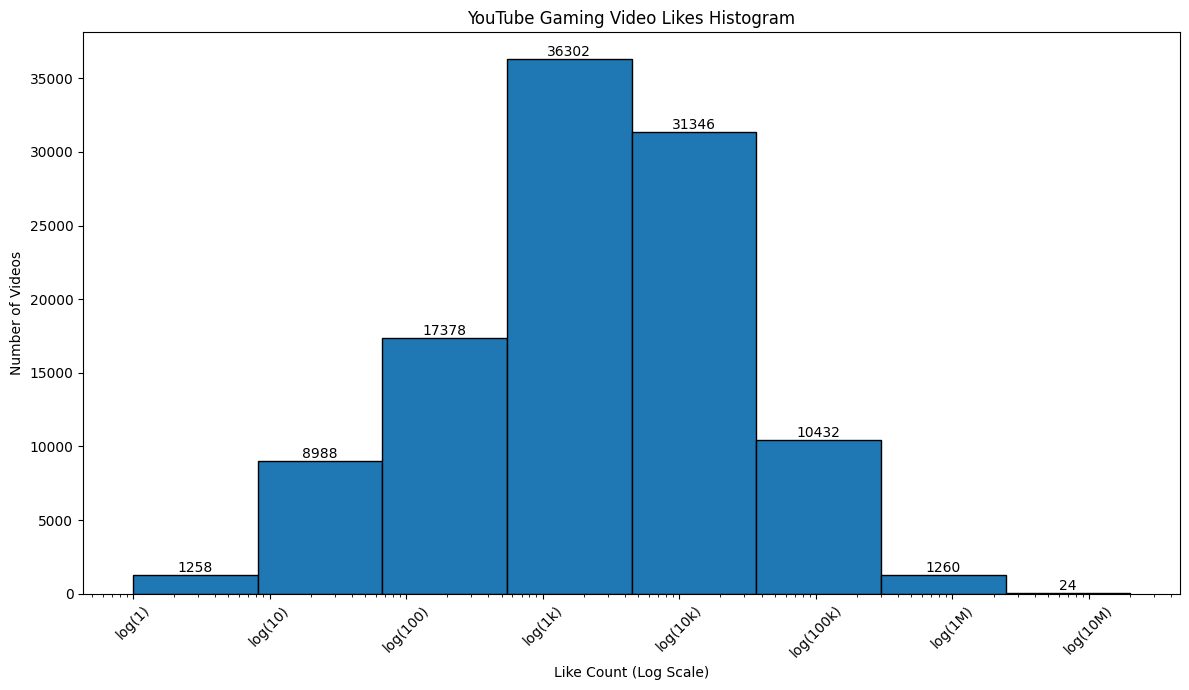

In [12]:
import matplotlib.pyplot as plt
import numpy as np

gaming = pd.read_csv("random_50_gaming_usa_videos.csv")
likes = gaming['like']

min_like = 1
max_like = 20000000
num_bins = 9

bins = np.logspace(np.log10(min_like), np.log10(max_like), num=num_bins)


plt.figure(figsize=(12, 7))

n, bins, patches = plt.hist(likes, bins=bins, edgecolor='black')

plt.xscale('log')
plt.xticks(
    [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7],
    ['log(1)', 'log(10)', 'log(100)', 'log(1k)', 'log(10k)', 'log(100k)', 'log(1M)', 'log(10M)'],
    rotation=45
)

plt.xlabel('Like Count (Log Scale)')
plt.ylabel('Number of Videos')
plt.title('YouTube Gaming Video Likes Histogram')
#plt.grid(True, which='both', linestyle='--', alpha=0.7)

for count, rect in zip(n, patches):
    x_center = 10**(0.5 * (np.log10(rect.get_x()) + np.log10(rect.get_x() + rect.get_width())))
    plt.text(x_center, count+0.2, 
             f'{int(count)}', 
             ha='center', va='bottom')

plt.tight_layout()

plt.show()

/tmp/ipykernel_40/3732282926.py:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_gaming = pd.read_csv("random_50_gaming_usa_videos.csv")
/root/venv/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6779: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)
posx and posy should be finite values
posx and posy should be finite values


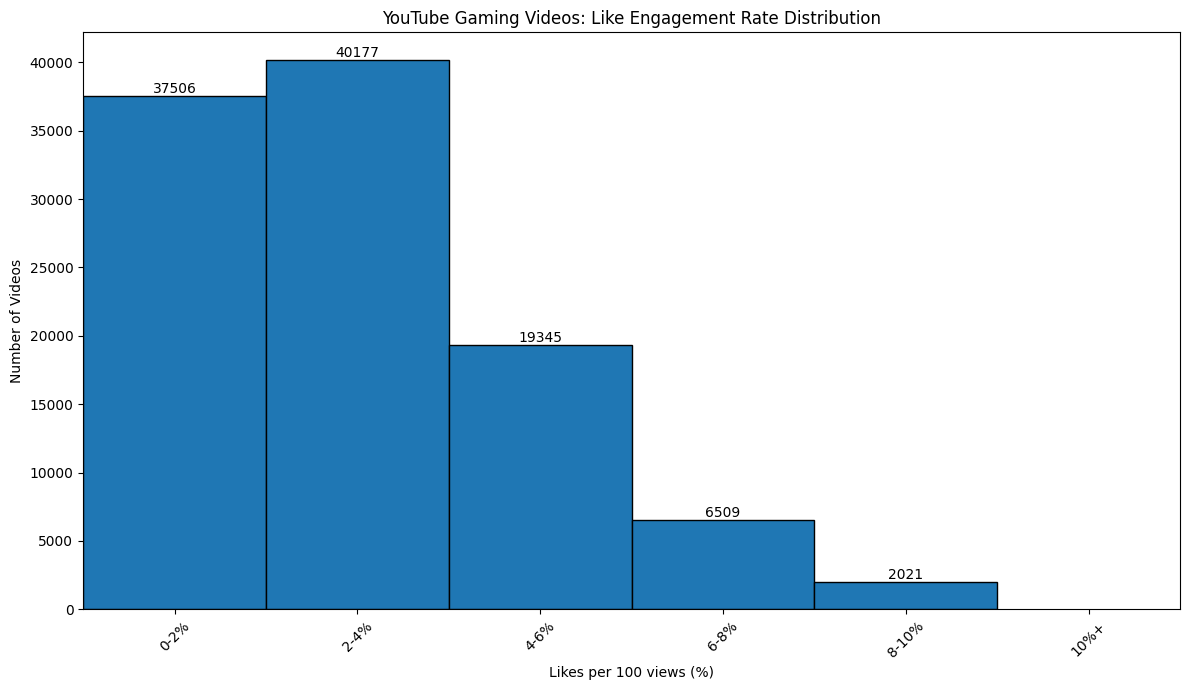

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

temp_gaming = pd.read_csv("random_50_gaming_usa_videos.csv")
temp_gaming = temp_gaming[(temp_gaming['view'] > 0) & (temp_gaming['like'] > 0)]
temp_gaming['views_to_likes'] = temp_gaming['view'] / temp_gaming['like']

like_per_view_pct = (temp_gaming['like'] / temp_gaming['view']) * 100

min_lpvp = like_per_view_pct.min()
max_lpvp = like_per_view_pct.max()

bins = [0, 2, 4, 6, 8, 10, np.inf]
labels = ['0-2%', '2-4%', '4-6%', '6-8%', '8-10%', '10%+']

plt.figure(figsize=(12, 7))

counts, bins, patches = plt.hist(
    like_per_view_pct,
    bins=bins,
    color='#1f77b4',
    edgecolor='black'
)

plt.xlim(0, 12)
plt.xticks(
    [1, 3, 5, 7, 9, 11],
    labels,
    rotation=45
)

plt.xlabel('Likes per 100 views (%)')
plt.ylabel('Number of Videos')
plt.title('YouTube Gaming Videos: Like Engagement Rate Distribution')
#plt.grid(True, which='both', linestyle='--', alpha=0.5)

for count, rect in zip(counts, patches):
    if count > 0:
        plt.text(
            rect.get_x() + rect.get_width()/2,
            count + 0.2,
            f'{int(count)}',
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.tight_layout()
plt.show()

/tmp/ipykernel_40/3684061649.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_gaming = pd.read_csv("random_50_gaming_usa_videos.csv")


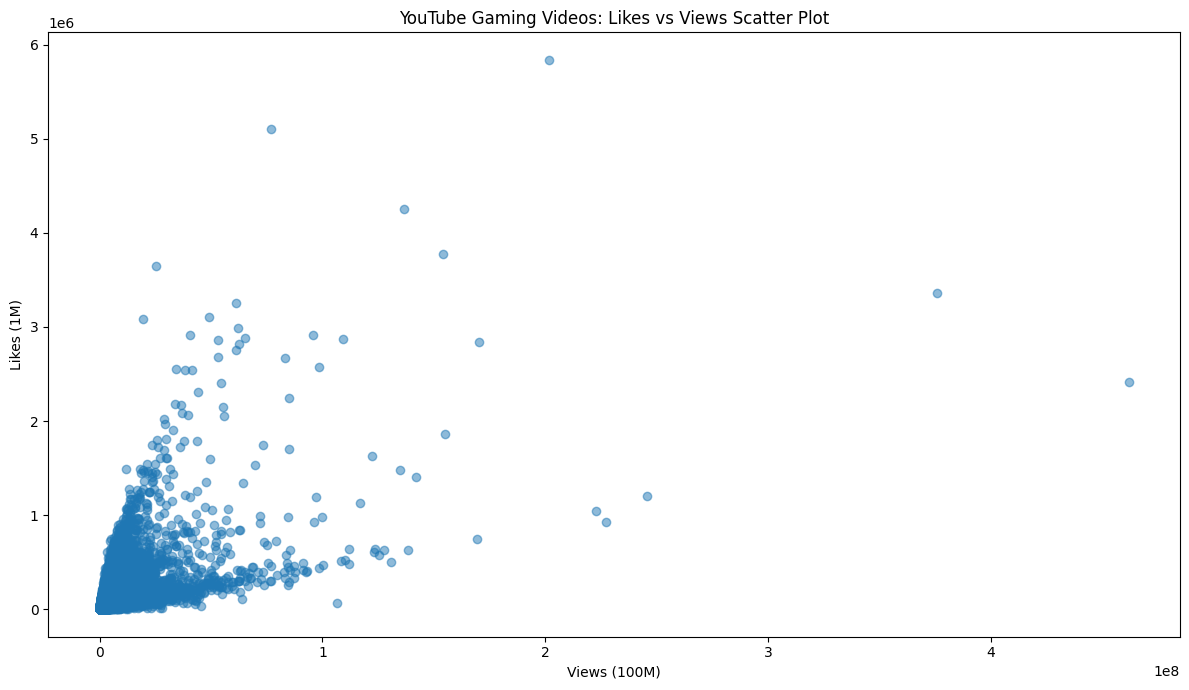

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

temp_gaming = pd.read_csv("random_50_gaming_usa_videos.csv")
temp_gaming = temp_gaming[(temp_gaming['view'] > 0) & (temp_gaming['like'] > 0)]


plt.figure(figsize=(12, 7))
plt.scatter(temp_gaming['view'], temp_gaming['like'], color='#1f77b4', alpha=0.5)

plt.xlabel('Views (100M)')
plt.ylabel('Likes (1M)')
plt.title('YouTube Gaming Videos: Likes vs Views Scatter Plot')
#plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



/tmp/ipykernel_40/489459973.py:6: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_gaming = pd.read_csv("random_50_gaming_usa_videos.csv")


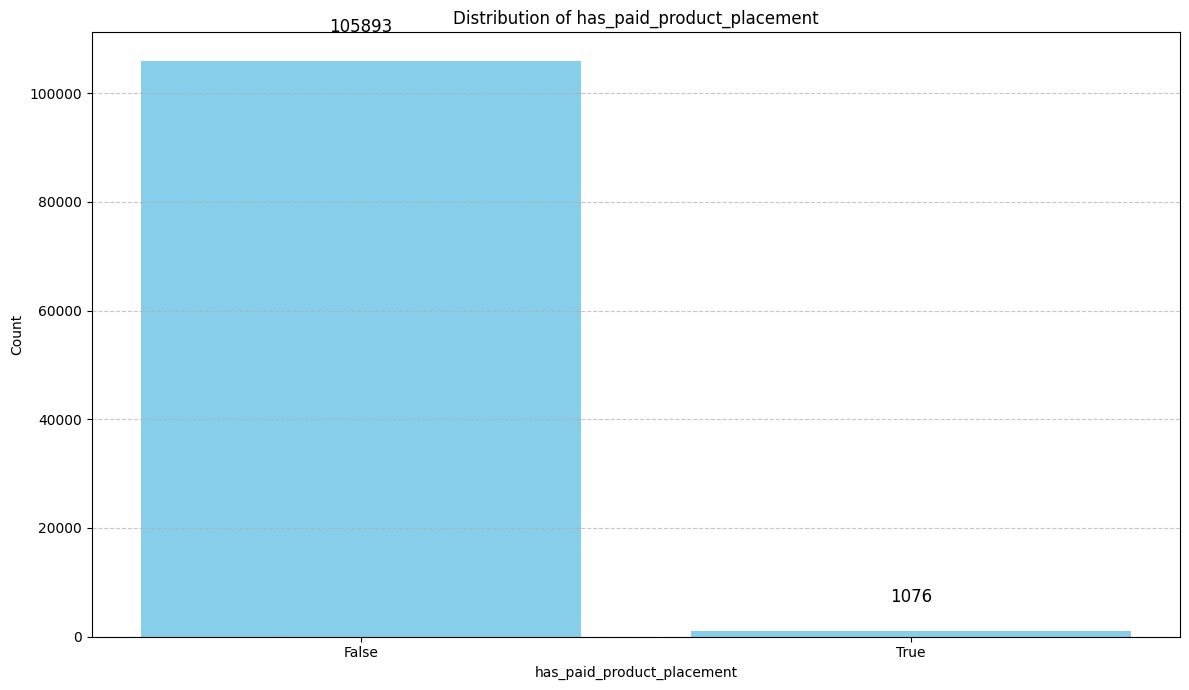

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

temp_gaming = pd.read_csv("random_50_gaming_usa_videos.csv")
temp_gaming = temp_gaming[(temp_gaming['view'] > 0) & (temp_gaming['like'] > 0)]

if 'has_paid_product_placement' in temp_gaming.columns:
    column_name = 'has_paid_product_placement'
    value_counts = temp_gaming[column_name].value_counts()

    plt.figure(figsize=(12, 7))
    plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column_name}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for index, value in enumerate(value_counts):
        plt.text(index, value + 0.05 * max(value_counts), str(value), ha='center', fontsize=12)

    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{column_name}' does not exist in the dataset.")

/tmp/ipykernel_40/1345097361.py:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_gaming = pd.read_csv("random_50_gaming_usa_videos.csv")


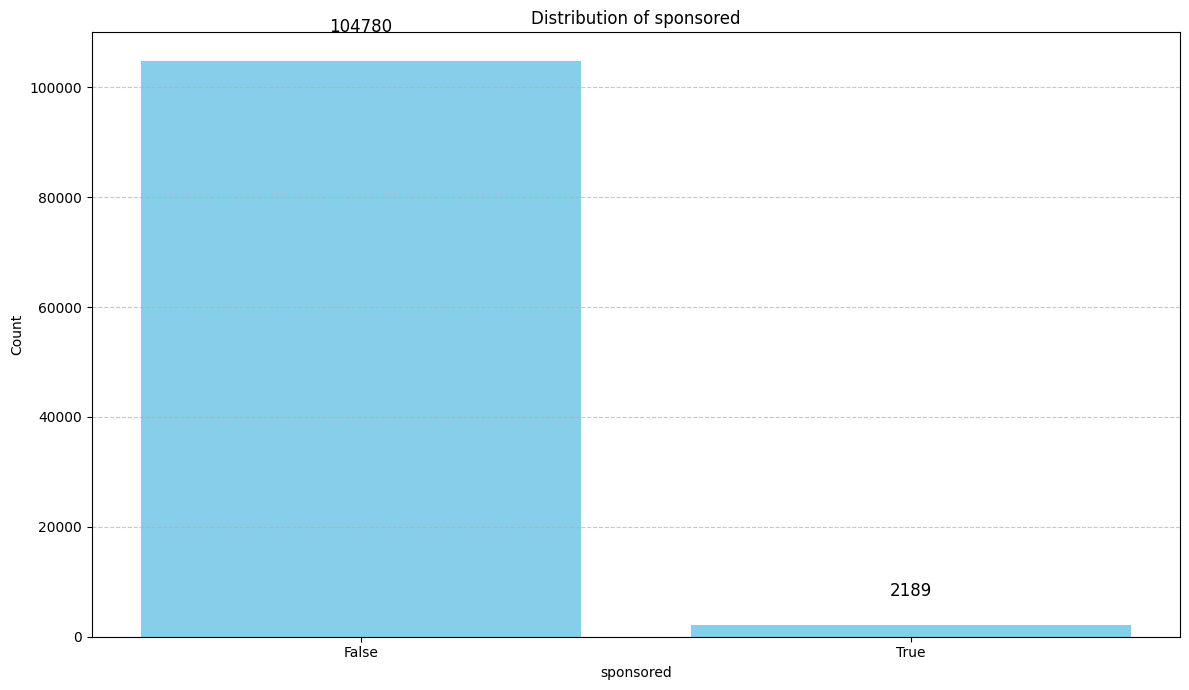

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

temp_gaming = pd.read_csv("random_50_gaming_usa_videos.csv")
temp_gaming = temp_gaming[(temp_gaming['view'] > 0) & (temp_gaming['like'] > 0)]

if 'sponsored' in temp_gaming.columns:
    column_name = 'sponsored'
    value_counts = temp_gaming[column_name].value_counts()

    plt.figure(figsize=(12, 7))
    plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column_name}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for index, value in enumerate(value_counts):
        plt.text(index, value + 0.05 * max(value_counts), str(value), ha='center', fontsize=12)

    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{column_name}' does not exist in the dataset.")

/tmp/ipykernel_40/170611653.py:4: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_gaming = pd.read_csv("random_50_gaming_usa_videos.csv")
{'has_paid_product_placement': 1076, 'sponsored': 2189}


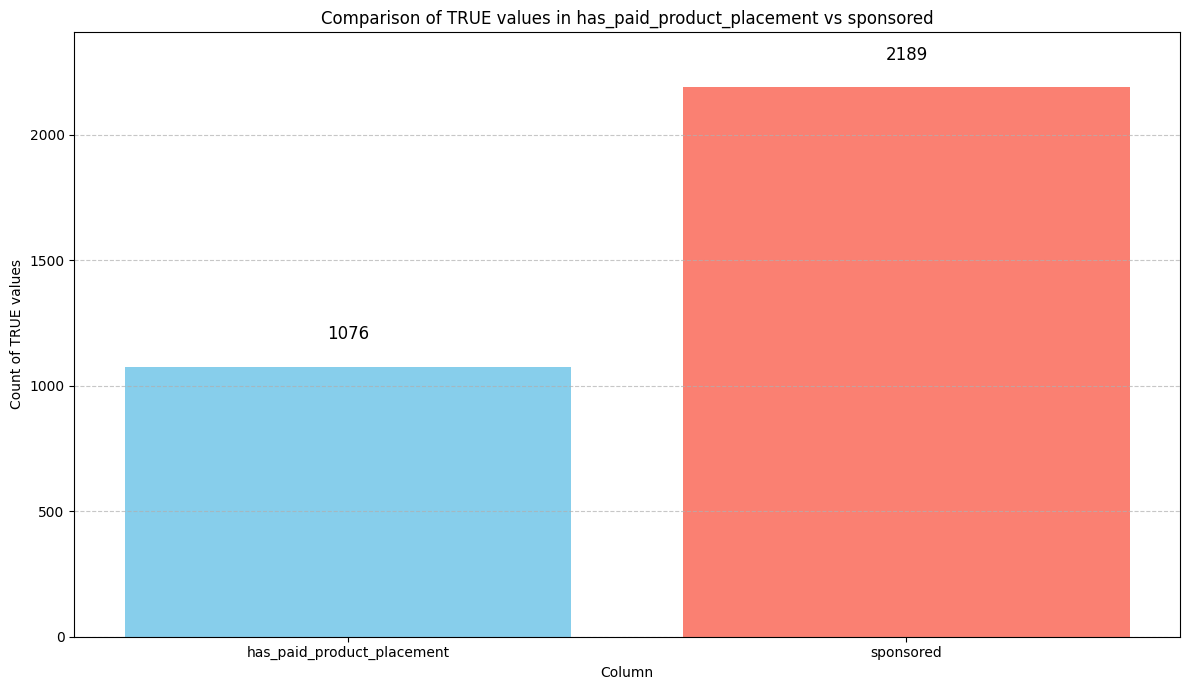

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

temp_gaming = pd.read_csv("random_50_gaming_usa_videos.csv")
temp_gaming = temp_gaming[(temp_gaming['view'] > 0) & (temp_gaming['like'] > 0)]

# Check if both columns exist in the dataset
columns_to_check = ['has_paid_product_placement', 'sponsored']
existing_columns = [col for col in columns_to_check if col in temp_gaming.columns]

if existing_columns:
    true_counts = {col: temp_gaming[col].sum() for col in existing_columns}
    print(true_counts)
    plt.figure(figsize=(12, 7))
    plt.bar(true_counts.keys(), true_counts.values(), color=['skyblue', 'salmon'])
    plt.xlabel('Column')
    plt.ylabel('Count of TRUE values')
    plt.title('Comparison of TRUE values in has_paid_product_placement vs sponsored')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, max(true_counts.values()) * 1.1)
    
    for index, value in enumerate(true_counts.values()):
        plt.text(index, value + 0.05 * max(true_counts.values()), str(value), ha='center', fontsize=12)
    
    plt.tight_layout()
    plt.show()
else:
    print(f"Columns {columns_to_check} do not exist in the dataset.")


/tmp/ipykernel_40/4124285932.py:7: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
             like      view   comment
like     1.000000  0.643584  0.385022
view     0.643584  1.000000  0.375927
comment  0.385022  0.375927  1.000000


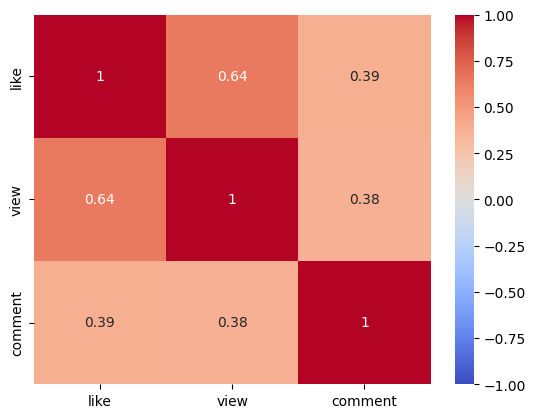

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "random_50_gaming_usa_videos.csv"
data = pd.read_csv(file_path)

# Select the columns of interest
columns_of_interest = ['like', 'view', 'comment']

# Generate the correlation matrix
correlation_matrix = data[columns_of_interest].corr()

# Print the correlation matrix
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [10]:
import pandas as pd
data = pd.read_csv('random_50_gaming_usa_videos.csv')
data.columns
# filtering to columns 
columns = ['publishedAt','title','description','channel_name','tags','category_id','duration','definition'
,'caption','view','like','comment','collection_time','short','subscriber_count']
kdata = data[columns]
# filter videos that are atleast 3 months old from collection time
kdata['publishedAt'] = pd.to_datetime(kdata['publishedAt'])
kdata['month_diff'] = (kdata.loc[:,'collection_time'].dt.year - kdata.loc[:,'publishedAt'].dt.year) * 12 + \
                      (kdata.loc[:,'collection_time'].dt.month - kdata.loc[:,'publishedAt'].dt.month)
kdata['month_diff']
# data.head()import panddas 

/tmp/ipykernel_1342/3806415338.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('random_50_gaming_usa_videos.csv')
/tmp/ipykernel_1342/3806415338.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kdata['publishedAt'] = pd.to_datetime(kdata['publishedAt'])


AttributeError: Can only use .dt accessor with datetimelike values

/tmp/ipykernel_157/311000470.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('random_50_gaming_usa_videos.csv')


,video_id,publishedAt,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,...,googlePlusUserId,view_count,subscriber_count,hidden_subscriber_count,video_count,branding_title,branding_description,branding_keywords,rank,upload_playlist
0,2HjctXU6N5I,2021-06-10T14:13:24Z,UCFl1mGlf5j0Qno1Kxnyv6FA,Why Time is the Most Valuable Resource in Leag...,Why Time is the Most Valuable Resource in Leag...,https://i.ytimg.com/vi/2HjctXU6N5I/hqdefault.jpg,480,360,Skill Capped Challenger LoL Guides,"['league of legends', 'league of legends pro g...",...,NaN,414711320,1000000,False,1526,Skill Capped Challenger LoL Guides,Skill Capped Challenger LoL Guides,"""Skill Capped"" Skillcapped Skill-Capped ""Leagu...",189,UUFl1mGlf5j0Qno1Kxnyv6FA
1,Yp-hUcvXnes,2021-09-29T10:59:50Z,UCFl1mGlf5j0Qno1Kxnyv6FA,3 BEST Champions to ESCAPE LOW ELO for END of ...,3 BEST CHAMPIONS to ESCAPE LOW ELO for EVERY R...,https://i.ytimg.com/vi/Yp-hUcvXnes/hqdefault.jpg,480,360,Skill Capped Challenger LoL Guides,"['best champions', 'best champs end of season'...",...,NaN,414711320,1000000,False,1526,Skill Capped Challenger LoL Guides,Skill Capped Challenger LoL Guides,"""Skill Capped"" Skillcapped Skill-Capped ""Leagu...",189,UUFl1mGlf5j0Qno1Kxnyv6FA
2,N5-AMeWwxqg,2019-09-06T14:30:02Z,UCFl1mGlf5j0Qno1Kxnyv6FA,How Does G2 Wunder Make Challengers Look BRONZ...,http://www.skill-capped.com/lol\nSubscribe: ht...,https://i.ytimg.com/vi/N5-AMeWwxqg/hqdefault.jpg,480,360,Skill Capped Challenger LoL Guides,"['G2 esports', 'G2', 'G2 Wunder', 'Wunder Guid...",...,NaN,414711320,1000000,False,1526,Skill Capped Challenger LoL Guides,Skill Capped Challenger LoL Guides,"""Skill Capped"" Skillcapped Skill-Capped ""Leagu...",189,UUFl1mGlf5j0Qno1Kxnyv6FA
3,-OzarB6x0q4,2021-12-18T14:00:01Z,UCFl1mGlf5j0Qno1Kxnyv6FA,How to Play Like a YASUO MAIN! - ULTIMATE YASU...,►Get the RANK You’ve Always Wanted: https://ww...,https://i.ytimg.com/vi/-OzarB6x0q4/hqdefault.jpg,480,360,Skill Capped Challenger LoL Guides,"['yasuo guide', 'yasuo', 'yasuo runes', 'yasuo...",...,NaN,414711320,1000000,False,1526,Skill Capped Challenger LoL Guides,Skill Capped Challenger LoL Guides,"""Skill Capped"" Skillcapped Skill-Capped ""Leagu...",189,UUFl1mGlf5j0Qno1Kxnyv6FA
4,2v3C7y5xu84,2024-09-15T11:30:01Z,UCFl1mGlf5j0Qno1Kxnyv6FA,Faker's CLEANEST AHRI Play of ALL TIME! #leagu...,►𝐖𝐄𝐁𝐒𝐈𝐓𝐄: https://www.skill-capped.com/lol/pri...,https://i.ytimg.com/vi/2v3C7y5xu84/hqdefault.jpg,480,360,Skill Capped Challenger LoL Guides,"['league of legends', 'lol season 14', 'lol gu...",...,NaN,414711320,1000000,False,1526,Skill Capped Challenger LoL Guides,Skill Capped Challenger LoL Guides,"""Skill Capped"" Skillcapped Skill-Capped ""Leagu...",189,UUFl1mGlf5j0Qno1Kxnyv6FA


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=395a814d-9932-4e75-96c1-b9471a984f5a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>